# Analise Funil SMS com evento PIX

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("funil outubro.csv")
df

,produtor,empresa,site,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),funnel_id,config_id,message,created_at,deleted_at,evento,evento_criado,evento_deletado,mensagens_enviadas
0,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,Manifestando o Segredo,CSM 3,6,4015,1301592.50,1217536.65,616575.00,2960,2005,1518,6,"Olá, agora pague o pix do box do milhão. Seu c...",2022-08-08 03:37:08,2022-08-08 03:37:28,PIX Gerado,2021-12-13 16:39:33,NaN,2
1,Roberto Costa (P),Conecta Ideias - Marketing LTDA,My History,CSM 3,13,0,0.00,NaN,0.00,0,0,830,6,{Primeiro_nome}; Para finalizar o pedido de VI...,2022-05-18 19:04:32,NaN,PIX Gerado,2021-12-13 16:39:33,NaN,420
2,Lucas Vsjgyn,Leemarii,Leemarii,Farmer 1,14,4601,440808.91,421382.80,225718.61,4343,2408,1448,6,"Oi {Primeiro_nome}, Recebemos Seu Pedido Com S...",2022-09-24 01:59:26,2022-10-01 06:35:47,PIX Gerado,2021-12-13 16:39:33,NaN,43
3,Thiago Carboni Reiter,THP COMMERCE,Bazar Do Brasil,Farmer 2,7,133700,25342926.00,23362729.25,4756272.50,44450,26075,645,6,Olá {Primeiro_nome} seu pix foi gerado com suc...,2022-01-31 21:41:19,2022-01-31 21:45:57,PIX Gerado,2021-12-13 16:39:33,NaN,174
4,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Femina Shop,Key account 2,8,5216,860911.43,799427.32,124911.66,1422,813,1185,6,{Primeiro_nome} Pague seu pix no valor: {Valor...,2022-01-31 18:45:33,2022-01-31 18:48:36,PIX Gerado,2021-12-13 16:39:33,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,MICHEL RODRIGUES WOLFER,AUTOMOTIVE TINTAS LTDA,Conforto e Ofertas,Farmer 1,2,0,0.00,NaN,0.00,0,0,1566,6,{Primeiro_nome} Volte e finalize seu pedido ai...,2022-09-04 19:23:40,2022-09-04 21:01:23,PIX Gerado,2021-12-13 16:39:33,NaN,1
89,LARYSSA FERREIRA COSTA ALVAREZ,LA MARKETING,Cardápios Flexíveis,Farmer 1,1,0,0.00,NaN,0.00,0,0,1622,6,"Olá {Primeiro_nome}, segue seu código Pix para...",2022-09-28 20:33:43,NaN,PIX Gerado,2021-12-13 16:39:33,NaN,0
90,Guilherme Mendel Coelho Freitas,Descontos na Lua,Descontos na Lua,Farmer 1,2,3,443.30,377.28,0.00,1,0,1619,6,"Olá {Primeiro_nome}, seu PIX em Descontos na L...",2022-10-03 09:52:35,NaN,PIX Gerado,2021-12-13 16:39:33,NaN,0
91,MARCELO LIMA SILVA,STARLINE DIGITAL LTDA,· Fire Blue UP ·,Farmer 1,2,57584,9672131.96,8809254.60,2601900.00,56640,20296,1661,6,Não conseguiu finalizar o PIX {Primeiro_nome}?...,2022-10-18 17:21:29,NaN,PIX Gerado,2021-12-13 16:39:33,NaN,236


In [3]:
df.drop(columns="evento_deletado", axis=1, inplace=True)
df.isnull().sum()

produtor                            0
empresa                             0
site                                0
squad                               0
lojas_criadas                       0
pedidos_aprovados                   0
total_aprovado                      0
total_parceiro                     43
sum(orders_pix_approved)            0
sum(t.orders_pix_amount)            0
sum(orders_pix_approved_amount)     0
funnel_id                           0
config_id                           0
message                             0
created_at                          0
deleted_at                         51
evento                              0
evento_criado                       0
mensagens_enviadas                  0
dtype: int64

### Período da Análise de Processamento foi determinado anteriormente, na extração de dados via MySQL: Entre 15/09/2022 a 15/10/2022

In [4]:
df.columns

Index(['produtor', 'empresa', 'site', 'squad', 'lojas_criadas',
       'pedidos_aprovados', 'total_aprovado', 'total_parceiro',
       'sum(orders_pix_approved)', 'sum(t.orders_pix_amount)',
       'sum(orders_pix_approved_amount)', 'funnel_id', 'config_id', 'message',
       'created_at', 'deleted_at', 'evento', 'evento_criado',
       'mensagens_enviadas'],
      dtype='object')

In [5]:
df["conversao_pix"] = round(df['sum(orders_pix_approved_amount)']/df['sum(t.orders_pix_amount)']*100,2)
df['custo_sms'] = df['mensagens_enviadas']*0.08
df['pedidos_pix_perdidos'] = df['sum(t.orders_pix_amount)'] - df['sum(orders_pix_approved_amount)']
df

,produtor,empresa,site,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),...,config_id,message,created_at,deleted_at,evento,evento_criado,mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
0,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,Manifestando o Segredo,CSM 3,6,4015,1301592.50,1217536.65,616575.00,2960,...,6,"Olá, agora pague o pix do box do milhão. Seu c...",2022-08-08 03:37:08,2022-08-08 03:37:28,PIX Gerado,2021-12-13 16:39:33,2,67.74,0.16,955
1,Roberto Costa (P),Conecta Ideias - Marketing LTDA,My History,CSM 3,13,0,0.00,NaN,0.00,0,...,6,{Primeiro_nome}; Para finalizar o pedido de VI...,2022-05-18 19:04:32,NaN,PIX Gerado,2021-12-13 16:39:33,420,NaN,33.60,0
2,Lucas Vsjgyn,Leemarii,Leemarii,Farmer 1,14,4601,440808.91,421382.80,225718.61,4343,...,6,"Oi {Primeiro_nome}, Recebemos Seu Pedido Com S...",2022-09-24 01:59:26,2022-10-01 06:35:47,PIX Gerado,2021-12-13 16:39:33,43,55.45,3.44,1935
3,Thiago Carboni Reiter,THP COMMERCE,Bazar Do Brasil,Farmer 2,7,133700,25342926.00,23362729.25,4756272.50,44450,...,6,Olá {Primeiro_nome} seu pix foi gerado com suc...,2022-01-31 21:41:19,2022-01-31 21:45:57,PIX Gerado,2021-12-13 16:39:33,174,58.66,13.92,18375
4,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Femina Shop,Key account 2,8,5216,860911.43,799427.32,124911.66,1422,...,6,{Primeiro_nome} Pague seu pix no valor: {Valor...,2022-01-31 18:45:33,2022-01-31 18:48:36,PIX Gerado,2021-12-13 16:39:33,0,57.17,0.00,609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,MICHEL RODRIGUES WOLFER,AUTOMOTIVE TINTAS LTDA,Conforto e Ofertas,Farmer 1,2,0,0.00,NaN,0.00,0,...,6,{Primeiro_nome} Volte e finalize seu pedido ai...,2022-09-04 19:23:40,2022-09-04 21:01:23,PIX Gerado,2021-12-13 16:39:33,1,NaN,0.08,0
89,LARYSSA FERREIRA COSTA ALVAREZ,LA MARKETING,Cardápios Flexíveis,Farmer 1,1,0,0.00,NaN,0.00,0,...,6,"Olá {Primeiro_nome}, segue seu código Pix para...",2022-09-28 20:33:43,NaN,PIX Gerado,2021-12-13 16:39:33,0,NaN,0.00,0
90,Guilherme Mendel Coelho Freitas,Descontos na Lua,Descontos na Lua,Farmer 1,2,3,443.30,377.28,0.00,1,...,6,"Olá {Primeiro_nome}, seu PIX em Descontos na L...",2022-10-03 09:52:35,NaN,PIX Gerado,2021-12-13 16:39:33,0,0.00,0.00,1
91,MARCELO LIMA SILVA,STARLINE DIGITAL LTDA,· Fire Blue UP ·,Farmer 1,2,57584,9672131.96,8809254.60,2601900.00,56640,...,6,Não conseguiu finalizar o PIX {Primeiro_nome}?...,2022-10-18 17:21:29,NaN,PIX Gerado,2021-12-13 16:39:33,236,35.83,18.88,36344


In [6]:
# Total
total = len(df)
print(f"Diagnosticou-se que {total} parceiros criaram o funil personalizado com o evento 'PIX Gerado'.")

# Pix Perdidos
pix_perdidos = df.pedidos_pix_perdidos.sum()
print(f"Calcula-se que {pix_perdidos} pedidos pix não foram pagos e poderiam ter sofrido alguma ação do funil para recuperá-los.")

# Churn
churn = df[df['total_aprovado'] < 1000]
n_churn = len(churn) 
print(f"Nessa amostra há {n_churn} parceiros que não processam ou processaram menos que R$1000 no período da análise.")



Diagnosticou-se que 93 parceiros criaram o funil personalizado com o evento 'PIX Gerado'.
Calcula-se que 35981767 pedidos pix não foram pagos e poderiam ter sofrido alguma ação do funil para recuperá-los.
Nessa amostra há 45 parceiros que não processam ou processaram menos que R$1000 no período da análise.


### Representatividade TPV

In [7]:
TPV_df = df.groupby(['produtor','empresa','squad'],as_index=False).sum().sort_values(by='total_aprovado', ascending=False).drop(columns=['funnel_id','config_id'])
TPV_df = TPV_df[TPV_df['total_aprovado'] > 0]
TPV_df

,produtor,empresa,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
35,INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),Key account 3,10,152909484,4.821354e+10,3.982863e+10,5.370497e+09,34393632,19634160,16926,57.09,1354.08,14759472
65,MAYCON VELOSO DA ROCHA,ROCHA ECOM,Key account 2,12,20493680,3.453280e+09,3.231844e+09,7.830261e+08,8859436,5023672,9068,56.70,725.44,3835764
34,HUDSON HENRIQUE MAGALHÃES,HM NEGOCIOS DIGITAIS LTDA,CSM 2,10,16615830,2.699551e+09,2.467854e+09,8.439324e+08,22115940,5957490,2310,26.94,184.80,16158450
92,WITLEY PAULO MENDES SILVA,WA INTERMEDIACAO DE NEGOCIOS DIGITAIS LTDA,Key account 3,3,1378284,4.624410e+08,4.140212e+08,3.048768e+06,20853,11916,993,57.14,79.44,8937
2,ANDRE LUIS RODRIGUES,ALLREPRES,CSM 7,7,1420302,2.412086e+08,2.176753e+08,4.884511e+07,1277250,383175,5109,30.00,408.72,894075
71,Marcus Maia,LOTO M. NEGOCIOS DIGITAIS,CSM 4,12,1002521,2.124349e+08,1.987570e+08,6.719292e+07,392821,342303,870,87.14,69.60,50518
32,Guilherme Fagundes Peres,CYGNUS,CSM 6,3,451776,8.720551e+07,8.078769e+07,2.067466e+07,151424,115232,415,76.10,33.20,36192
53,LUIZ DE LIMA,BARATO PRATICO,CSM 4,5,108885,7.477101e+07,6.686685e+07,1.731710e+07,44835,29097,183,64.90,14.64,15738
52,LUCCA PROTASIO DAZZANI,INOVATI,CSM 4,8,352260,4.773966e+07,4.407613e+07,1.026088e+07,123291,72615,309,58.90,24.72,50676
88,Thiago Carboni Reiter,THP COMMERCE,Farmer 2,7,133700,2.534293e+07,2.336273e+07,4.756272e+06,44450,26075,174,58.66,13.92,18375


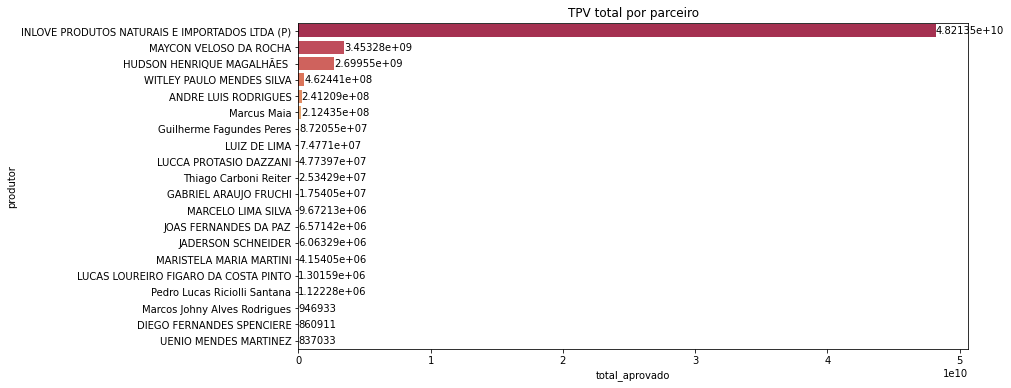

In [8]:
plt.figure(figsize=(12,6))
plt.title("TPV total por parceiro")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['total_aprovado'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

In [9]:
TPV_total = TPV_df.total_aprovado.sum()
print(f"Todos os parceiros representam o total de R${round(TPV_total,2)}")

Todos os parceiros representam o total de R$55570289714.76


### Contribuição do PIX no TPV de cada PARCEIRO

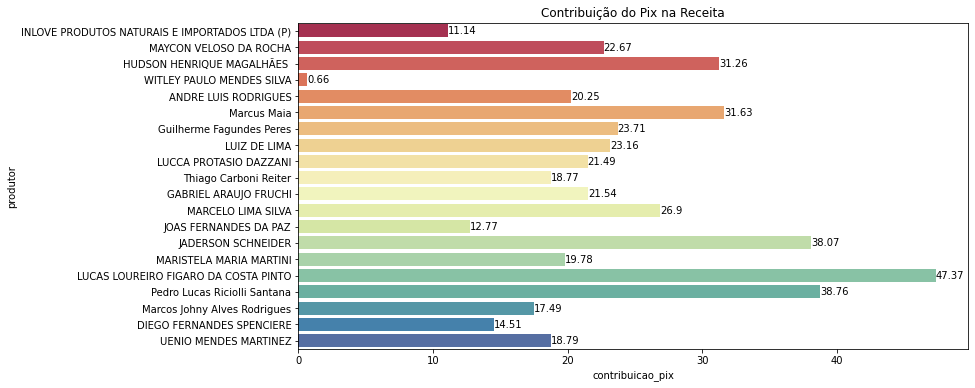

In [10]:
TPV_df['contribuicao_pix'] = round(TPV_df['sum(orders_pix_approved)']/TPV_df['total_aprovado']*100,2)

plt.figure(figsize=(12,6))
plt.title("Contribuição do Pix na Receita")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['contribuicao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Conversão PIX

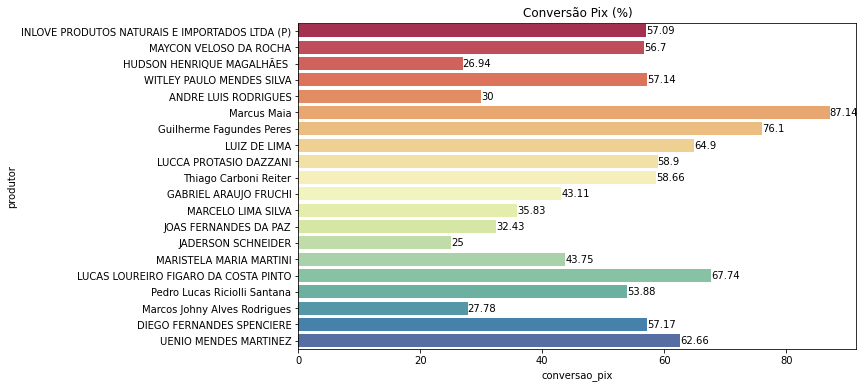

In [11]:
plt.figure(figsize=(10,6))
plt.title("Conversão Pix (%)")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['conversao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Disparos de SMS

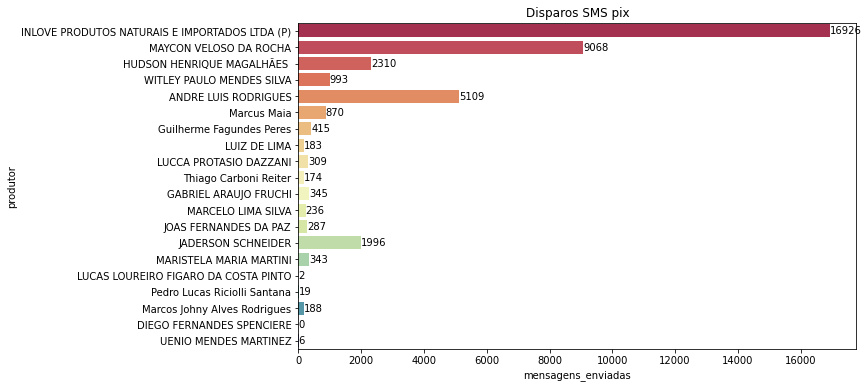

In [12]:
plt.figure(figsize=(10,6))
plt.title("Disparos SMS pix")


top20 = TPV_df.head(20)
ax = sns.barplot(x=top10['mensagens_enviadas'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

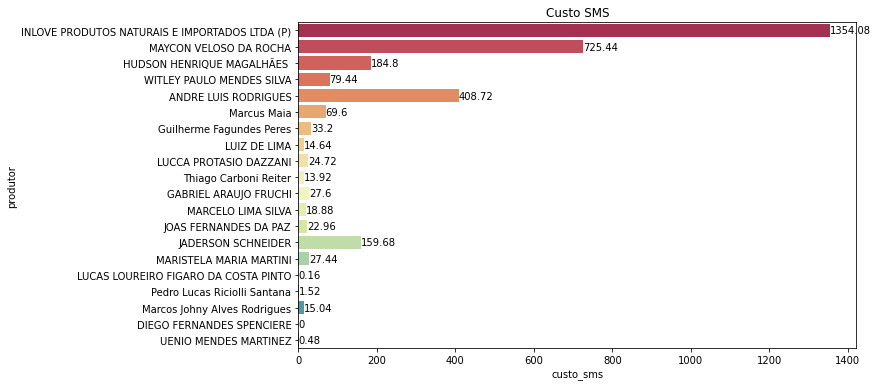

In [13]:
plt.figure(figsize=(10,6))
plt.title("Custo SMS")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['custo_sms'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Pix Perdido

In [14]:
# Pix Perdidos
pix_perdidos = df.pedidos_pix_perdidos.sum()
print(f"Calcula-se que {pix_perdidos} pedidos pix não foram pagos e poderiam ter sofrido alguma ação do funil para recuperá-los.")

Calcula-se que 35981767 pedidos pix não foram pagos e poderiam ter sofrido alguma ação do funil para recuperá-los.


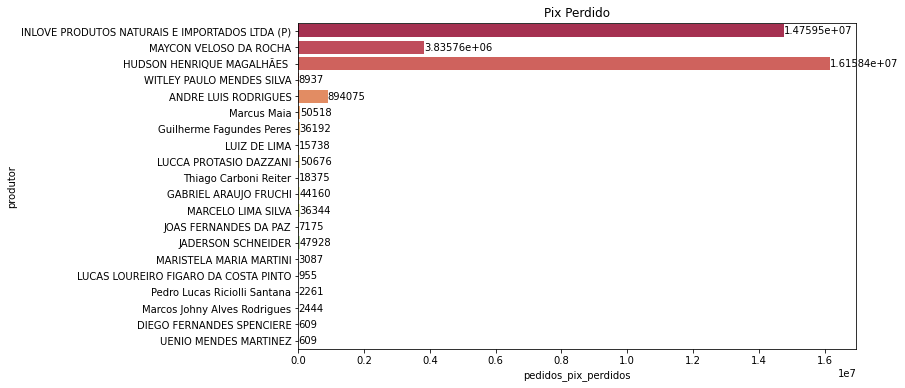

In [15]:
plt.figure(figsize=(10,6))
plt.title("Pix Perdido")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['pedidos_pix_perdidos'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

## Parceiros com o Funil Desativado



In [16]:
deleted = df.dropna()

In [17]:
amount_deleted = len(deleted)
print(f"Desses {total} parceiros, {amount_deleted} desativaram o funil de sms personalizado.")

Desses 93 parceiros, 16 desativaram o funil de sms personalizado.


#### Representatividade TPV

In [18]:
deleted_TPV = deleted.total_aprovado.sum()
print(f"Estes {amount_deleted} desativados somam o total de R${deleted_TPV}")
# Churn
churn = deleted[deleted['total_aprovado'] < 1000]
n_churn = len(churn) 
print(f"Nessa amostra há {n_churn} parceiros que não processam ou processaram menos que R$1000 no período da análise.")

Estes 16 desativados somam o total de R$3064384544.41
Nessa amostra há 0 parceiros que não processam ou processaram menos que R$1000 no período da análise.


In [19]:
TPV_df = deleted.groupby(['produtor','empresa','squad'],as_index=False).sum().sort_values(by='total_aprovado', ascending=False).drop(columns=['funnel_id','config_id'])
TPV_df = TPV_df[TPV_df['total_aprovado'] > 0]
TPV_df

,produtor,empresa,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
9,HUDSON HENRIQUE MAGALHÃES,HM NEGOCIOS DIGITAIS LTDA,CSM 2,10,16615830,2.699551e+09,2.467854e+09,8.439324e+08,22115940,5957490,2310,26.94,184.80,16158450
0,ANDRE LUIS RODRIGUES,ALLREPRES,CSM 7,7,1420302,2.412086e+08,2.176753e+08,4.884511e+07,1277250,383175,5109,30.00,408.72,894075
8,Guilherme Fagundes Peres,CYGNUS,CSM 6,3,451776,8.720551e+07,8.078769e+07,2.067466e+07,151424,115232,415,76.10,33.20,36192
14,Thiago Carboni Reiter,THP COMMERCE,Farmer 2,7,133700,2.534293e+07,2.336273e+07,4.756272e+06,44450,26075,174,58.66,13.92,18375
10,JADERSON SCHNEIDER,JS MARKETING,Farmer 1,5,37943,6.063291e+06,5.353837e+06,2.308532e+06,63904,15976,1996,25.00,159.68,47928
12,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,CSM 3,6,4015,1.301592e+06,1.217537e+06,6.165750e+05,2960,2005,2,67.74,0.16,955
4,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Key account 2,8,5216,8.609114e+05,7.994273e+05,1.249117e+05,1422,813,0,57.17,0.00,609
15,UENIO MENDES MARTINEZ,MARTINEZ MIDIA,CSM 3,5,4655,8.370331e+05,7.658405e+05,1.572721e+05,1631,1022,6,62.66,0.48,609
1,ANDRE NASCIMENTO DA SILVA,NASCIMENTO NEGOCIOS DIGITAIS E SERVICOS DE APO...,Farmer 1,2,2528,4.440321e+05,3.997526e+05,7.350160e+04,948,632,153,66.67,12.24,316
13,Lucas Vsjgyn,Leemarii,Farmer 1,14,4601,4.408089e+05,4.213828e+05,2.257186e+05,4343,2408,43,55.45,3.44,1935


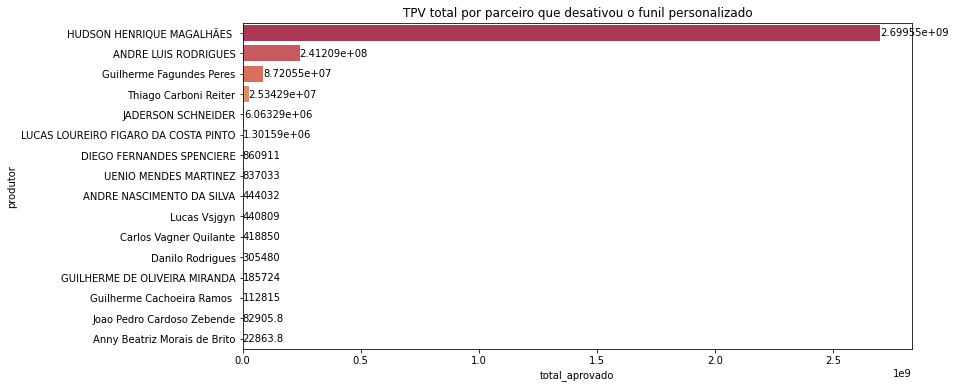

In [20]:
plt.figure(figsize=(12,6))
plt.title("TPV total por parceiro que desativou o funil personalizado")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['total_aprovado'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Contribuição do PIX no TPV de cada PARCEIRO que desativou o funil personalizado

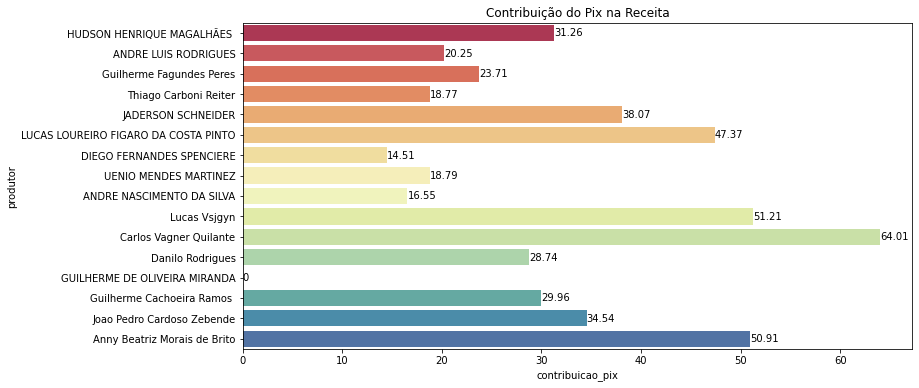

In [21]:
TPV_df['contribuicao_pix'] = round(TPV_df['sum(orders_pix_approved)']/TPV_df['total_aprovado']*100,2)

plt.figure(figsize=(12,6))
plt.title("Contribuição do Pix na Receita")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['contribuicao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Conversão do PIX de cada PARCEIRO que desativou o funil personalizado

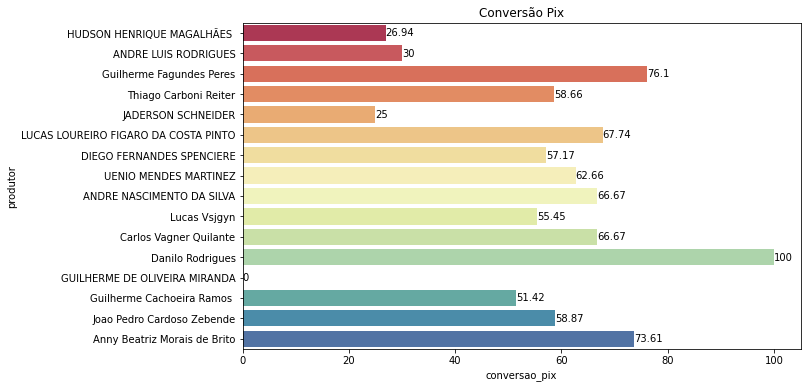

In [22]:
plt.figure(figsize=(10,6))
plt.title("Conversão Pix")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['conversao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Disparos de SMS

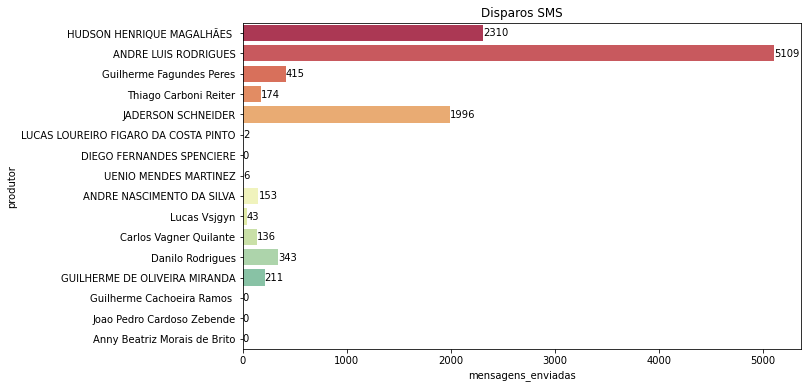

In [23]:
plt.figure(figsize=(10,6))
plt.title("Disparos SMS")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['mensagens_enviadas'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

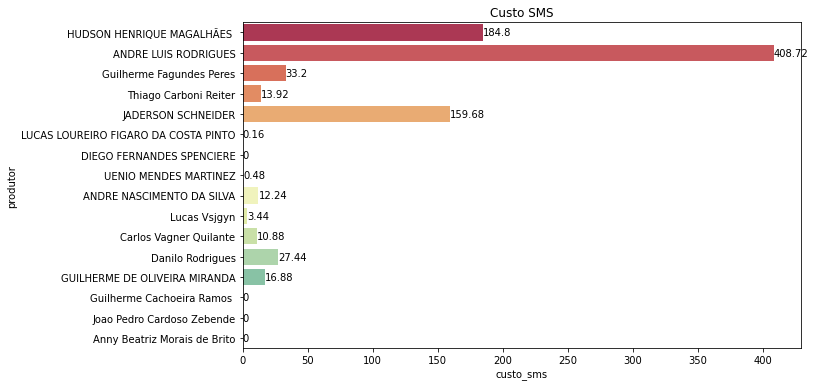

In [24]:
plt.figure(figsize=(10,6))
plt.title("Custo SMS")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['custo_sms'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Pix Perdido

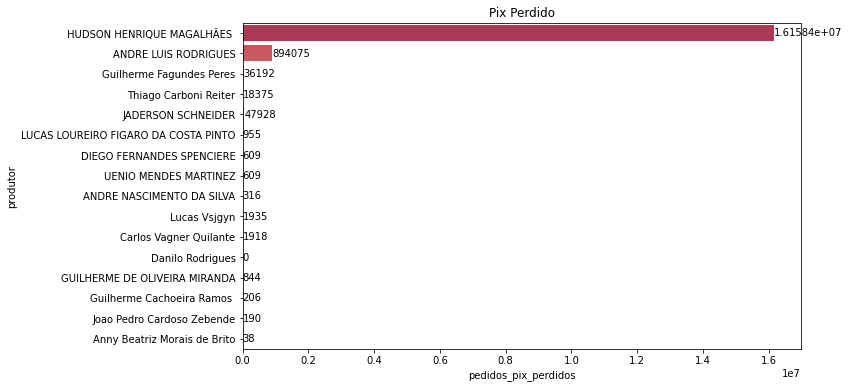

In [25]:
plt.figure(figsize=(10,6))
plt.title("Pix Perdido")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['pedidos_pix_perdidos'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

## Parceiros que mantiveram o funil automático ativo

In [26]:
active = df.drop(deleted.index)
active

,produtor,empresa,site,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),...,config_id,message,created_at,deleted_at,evento,evento_criado,mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
1,Roberto Costa (P),Conecta Ideias - Marketing LTDA,My History,CSM 3,13,0,0.000000e+00,NaN,0.00,0,...,6,{Primeiro_nome}; Para finalizar o pedido de VI...,2022-05-18 19:04:32,NaN,PIX Gerado,2021-12-13 16:39:33,420,NaN,33.60,0
5,Marcus Maia,LOTO M. NEGOCIOS DIGITAIS,Programa LotoMais,CSM 4,12,1002521,2.124349e+08,1.987570e+08,67192920.47,392821,...,6,PROGRAMA LOTOMAIS - Para finalizar seu pedido...,2022-02-10 06:34:07,NaN,PIX Gerado,2021-12-13 16:39:33,870,87.14,69.60,50518
6,Fabio Rodrigues,LAURENS,OutBela,Farmer 2,8,0,0.000000e+00,NaN,0.00,0,...,6,Olá {Primeiro_nome} obrigado pela compra na {N...,2022-05-10 22:24:51,NaN,PIX Gerado,2021-12-13 16:39:33,0,NaN,0.00,0
7,DEIVID MONTEIRO DOS SANTOS (P),DEIVID MONTEIRO DOS SANTOS (P),Distribuidora katarina,CSM 4,6,102,1.352754e+05,1.219961e+05,3234.49,19,...,6,segue seu código pix {Codigo_pix},2022-03-08 21:05:27,NaN,PIX Gerado,2021-12-13 16:39:33,1,21.05,0.08,15
8,FPG DE PAULA NEGOCIOS ONLINE LTDA (P),SLT NEGOCIOS ONLINE,Solitarystore,CSM 1,5,716,9.205892e+04,8.544645e+04,29269.08,576,...,6,"Olá {Primeiro_nome}, pague seu pix agora mesmo...",2022-10-05 16:12:19,NaN,PIX Gerado,2021-12-13 16:39:33,1,43.92,0.08,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,MICHEL RODRIGUES WOLFER,AUTOMOTIVE TINTAS LTDA,Conforto e Ofertas,Farmer 1,2,0,0.000000e+00,NaN,0.00,0,...,6,{Primeiro_nome} Volte e finalize seu pedido ai...,2022-09-04 19:23:40,2022-09-04 21:01:23,PIX Gerado,2021-12-13 16:39:33,1,NaN,0.08,0
89,LARYSSA FERREIRA COSTA ALVAREZ,LA MARKETING,Cardápios Flexíveis,Farmer 1,1,0,0.000000e+00,NaN,0.00,0,...,6,"Olá {Primeiro_nome}, segue seu código Pix para...",2022-09-28 20:33:43,NaN,PIX Gerado,2021-12-13 16:39:33,0,NaN,0.00,0
90,Guilherme Mendel Coelho Freitas,Descontos na Lua,Descontos na Lua,Farmer 1,2,3,4.433000e+02,3.772800e+02,0.00,1,...,6,"Olá {Primeiro_nome}, seu PIX em Descontos na L...",2022-10-03 09:52:35,NaN,PIX Gerado,2021-12-13 16:39:33,0,0.00,0.00,1
91,MARCELO LIMA SILVA,STARLINE DIGITAL LTDA,· Fire Blue UP ·,Farmer 1,2,57584,9.672132e+06,8.809255e+06,2601900.00,56640,...,6,Não conseguiu finalizar o PIX {Primeiro_nome}?...,2022-10-18 17:21:29,NaN,PIX Gerado,2021-12-13 16:39:33,236,35.83,18.88,36344


In [27]:
amount_active = len(active)
print(f"Outros {amount_active} manteram o funil de sms personalizado ativo.")

Outros 77 manteram o funil de sms personalizado ativo.


#### Representatividade TPV

In [28]:
TPV_df = active.groupby(['produtor','empresa','squad'],as_index=False).sum().sort_values(by='total_aprovado', ascending=False).drop(columns=['funnel_id','config_id'])
TPV_df = TPV_df[TPV_df['total_aprovado'] > 0]
TPV_df

,produtor,empresa,squad,lojas_criadas,pedidos_aprovados,total_aprovado,total_parceiro,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),mensagens_enviadas,conversao_pix,custo_sms,pedidos_pix_perdidos
25,INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),Key account 3,10,152909484,4.821354e+10,3.982863e+10,5.370497e+09,34393632,19634160,16926,57.09,1354.08,14759472
51,MAYCON VELOSO DA ROCHA,ROCHA ECOM,Key account 2,12,20493680,3.453280e+09,3.231844e+09,7.830261e+08,8859436,5023672,9068,56.70,725.44,3835764
76,WITLEY PAULO MENDES SILVA,WA INTERMEDIACAO DE NEGOCIOS DIGITAIS LTDA,Key account 3,3,1378284,4.624410e+08,4.140212e+08,3.048768e+06,20853,11916,993,57.14,79.44,8937
57,Marcus Maia,LOTO M. NEGOCIOS DIGITAIS,CSM 4,12,1002521,2.124349e+08,1.987570e+08,6.719292e+07,392821,342303,870,87.14,69.60,50518
40,LUIZ DE LIMA,BARATO PRATICO,CSM 4,5,108885,7.477101e+07,6.686685e+07,1.731710e+07,44835,29097,183,64.90,14.64,15738
39,LUCCA PROTASIO DAZZANI,INOVATI,CSM 4,8,352260,4.773966e+07,4.407613e+07,1.026088e+07,123291,72615,309,58.90,24.72,50676
19,GABRIEL ARAUJO FRUCHI,GABRIEL ARAUJO FRUCHI,Key account 3,8,123165,1.754053e+07,1.557749e+07,3.777453e+06,77625,33465,345,43.11,27.60,44160
44,MARCELO LIMA SILVA,STARLINE DIGITAL LTDA,Farmer 1,2,57584,9.672132e+06,8.809255e+06,2.601900e+06,56640,20296,236,35.83,18.88,36344
27,JOAS FERNANDES DA PAZ,JF NEGOCIOS DIGITAIS,Farmer 2,5,22386,6.571422e+06,5.906417e+06,8.391593e+05,10619,3444,287,32.43,22.96,7175
46,MARISTELA MARIA MARTINI,INOVALABS LTDA,Farmer 1,4,10290,4.154052e+06,3.717979e+06,8.218623e+05,5488,2401,343,43.75,27.44,3087


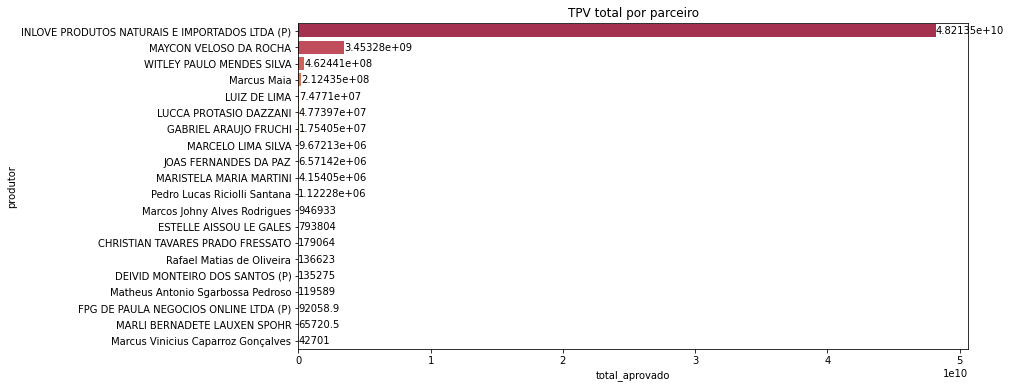

In [29]:
plt.figure(figsize=(12,6))
plt.title("TPV total por parceiro")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['total_aprovado'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

In [30]:
77-45

32

In [31]:
active_TPV = active.total_aprovado.sum()
print(f"Estes {amount_active} que mantiveram o funil ativo, somam o total de R${active_TPV} de TPV do mês de Outubro.")
# Churn
churn = active[active['total_aprovado'] < 1000]
n_churn = len(churn) 
print(f"Nessa amostra há {n_churn} parceiros que não processam ou processaram menos que R$1000 no período da análise.")

Estes 77 que mantiveram o funil ativo, somam o total de R$52505905170.35 de TPV do mês de Outubro.
Nessa amostra há 45 parceiros que não processam ou processaram menos que R$1000 no período da análise.


* **Apenas 31 parceiros mantiveram o funil personalizado ativo E continuam processando com a Appmax**

* **Outros 45 parceiros mantiveram o funil de SMS personalizado ativo, porém foram classificados como CHURN (TPV < 1000).**

32

#### Contribuição do PIX no TPV de cada PARCEIRO que manteve o funil personalizado ativo

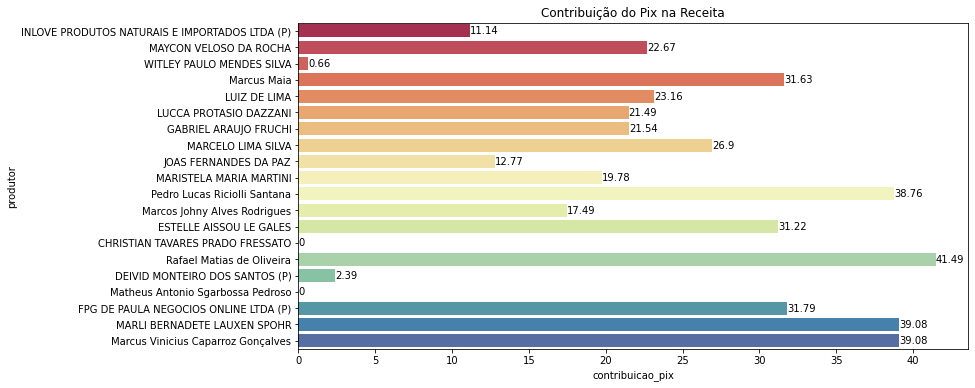

In [36]:
TPV_df['contribuicao_pix'] = round(TPV_df['sum(orders_pix_approved)']/TPV_df['total_aprovado']*100,2)

plt.figure(figsize=(12,6))
plt.title("Contribuição do Pix na Receita")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['contribuicao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Conversão do PIX de cada PARCEIRO que manteve o funil personalizado ativo

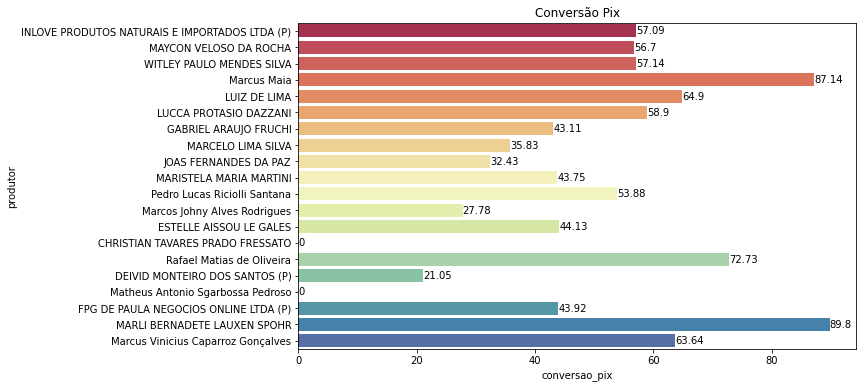

In [37]:
plt.figure(figsize=(10,6))
plt.title("Conversão Pix")


top10 = TPV_df.head(20)
ax = sns.barplot(x=top10['conversao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

## Disparos de SMS

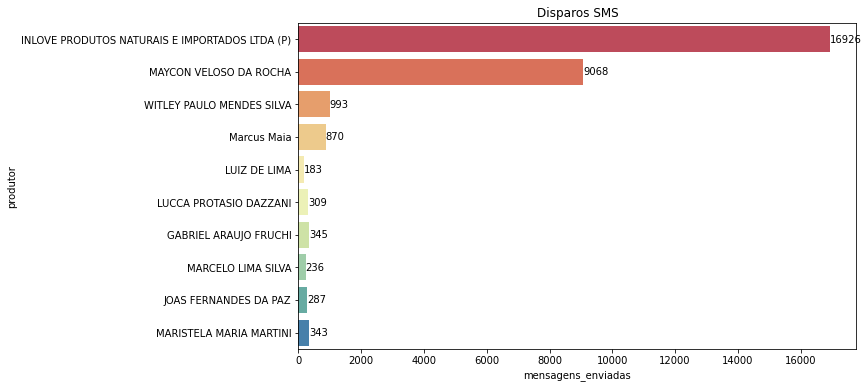

In [34]:
plt.figure(figsize=(10,6))
plt.title("Disparos SMS")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['mensagens_enviadas'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

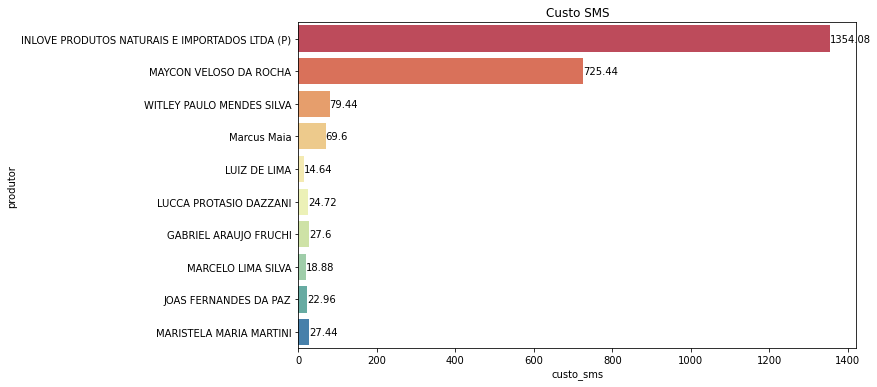

In [35]:
plt.figure(figsize=(10,6))
plt.title("Custo SMS")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['custo_sms'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)